# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -1.363265
b    1.609550
c   -0.092165
d   -0.113544
e    1.848961
dtype: float64
a         NaN
b    3.219099
c   -0.184330
d   -0.227089
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2020,11,9,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 9 2020'
# or alternatively
date = '9/11/2020 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2020-11-09
2020-11-09 14:45:10.000015
9/11/2020 14:45:00
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-12 14:45:00',
               '2020-09-13 14:45:00', '2020-09-14 14:45:00',
               '2020-09-15 14:45:00', '2020-09-16 14:45:00',
               '2020-09-17 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2020-09-11 14:45:00', '2020-09-11 14:45:01',
               '2020-09-11 14:45:02', '2020-09-11 14:45:03',
               '2020-09-11 14:45:04', '2020-09-11 14:45:05',
               '2020-09-11 14:45:06', '2020-09-11 14:45:07',
               '2020-09-11 14:45:08', '2020-09-11 14:45:09',
               ...
               '2020-09-11 15:44:50', '2020-09-11 15:44:51',
               '2020-09-11 15:44:52', '2020-09-11 15:44:53',
               '2020-09-11 15:44:54', '2020-09-11 15:44:55',
               '2020-09-11 15:44:56', '2020-09-11 15:44:57',
               '2020-09-11 15:44:58', '2020-09-11 15:44:59'],
              dtype='datetime64[ns]', lengt

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2010-11-12 00:00:00
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [9]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2020-09-11':'2020-11-11'], '\n') # Note - includes end time


2020-09-11 14:45:00    10.118467
2020-09-12 14:45:00     9.584922
2020-09-13 14:45:00     9.631526
2020-09-14 14:45:00     9.679223
Freq: D, dtype: float64 

2020-09-11 14:45:00    10.118467
2020-09-12 14:45:00     9.584922
2020-09-13 14:45:00     9.631526
2020-09-14 14:45:00     9.679223
2020-09-15 14:45:00    10.250424
2020-09-16 14:45:00    10.810623
2020-09-17 14:45:00     8.966732
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [10]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [11]:
entries=10
dates=pd.date_range('11/9/2020 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2020-11-09 14:45:00,-0.848895,0.416394,0.348435,-0.383920
2020-11-09 15:45:00,1.485230,0.417238,-0.472676,1.480805
2020-11-09 16:45:00,-0.812363,2.633663,-0.286101,-1.594432
2020-11-09 17:45:00,1.273279,-0.071818,0.157045,-1.281594
2020-11-09 18:45:00,0.398010,0.665087,-0.293939,-1.740886
2020-11-09 19:45:00,-1.558733,-1.122894,-1.063525,-0.318038
2020-11-09 20:45:00,0.495941,1.256352,-0.901925,0.495619
2020-11-09 21:45:00,1.442191,0.083591,-1.050583,1.020946
2020-11-09 22:45:00,-1.394716,0.077790,0.417599,0.829896
2020-11-09 23:45:00,0.819460,1.270346,-0.528747,-0.229595


or by means of a dictionary:


In [12]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head()

,A,B,C,D
2020-11-09 14:45:00,-0.848895,0.416394,0.348435,-0.383920
2020-11-09 15:45:00,1.485230,0.417238,-0.472676,1.480805
2020-11-09 16:45:00,-0.812363,2.633663,-0.286101,-1.594432
2020-11-09 17:45:00,1.273279,-0.071818,0.157045,-1.281594
2020-11-09 18:45:00,0.398010,0.665087,-0.293939,-1.740886


In [14]:
df.tail(4)

,A,B,C,D
2020-11-09 20:45:00,0.495941,1.256352,-0.901925,0.495619
2020-11-09 21:45:00,1.442191,0.083591,-1.050583,1.020946
2020-11-09 22:45:00,-1.394716,0.077790,0.417599,0.829896
2020-11-09 23:45:00,0.819460,1.270346,-0.528747,-0.229595


In [15]:
df.index

DatetimeIndex(['2020-11-09 14:45:00', '2020-11-09 15:45:00',
               '2020-11-09 16:45:00', '2020-11-09 17:45:00',
               '2020-11-09 18:45:00', '2020-11-09 19:45:00',
               '2020-11-09 20:45:00', '2020-11-09 21:45:00',
               '2020-11-09 22:45:00', '2020-11-09 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.84889518,  0.41639378,  0.34843494, -0.38392017],
       [ 1.48523046,  0.41723822, -0.47267646,  1.48080523],
       [-0.81236278,  2.6336635 , -0.28610129, -1.59443189],
       [ 1.27327934, -0.07181806,  0.15704525, -1.28159377],
       [ 0.39801019,  0.66508727, -0.29393946, -1.74088614],
       [-1.55873274, -1.12289368, -1.06352468, -0.31803831],
       [ 0.4959406 ,  1.25635202, -0.90192474,  0.49561852],
       [ 1.442191  ,  0.0835906 , -1.05058303,  1.02094597],
       [-1.3947158 ,  0.07779029,  0.41759879,  0.82989607],
       [ 0.81945965,  1.27034584, -0.52874654, -0.22959467]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.129940,0.562575,-0.367442,-0.172120
std,1.181785,1.001797,0.546692,1.124962
min,-1.558733,-1.122894,-1.063525,-1.740886
25%,-0.839762,0.079240,-0.808630,-1.057175
50%,0.446975,0.416816,-0.383308,-0.273816
75%,1.159824,1.108536,0.046259,0.746327
max,1.485230,2.633663,0.417599,1.480805


In [19]:
df.T

,2020-11-09 14:45:00,2020-11-09 15:45:00,2020-11-09 16:45:00,2020-11-09 17:45:00,2020-11-09 18:45:00,2020-11-09 19:45:00,2020-11-09 20:45:00,2020-11-09 21:45:00,2020-11-09 22:45:00,2020-11-09 23:45:00
A,-0.848895,1.485230,-0.812363,1.273279,0.398010,-1.558733,0.495941,1.442191,-1.394716,0.819460
B,0.416394,0.417238,2.633663,-0.071818,0.665087,-1.122894,1.256352,0.083591,0.077790,1.270346
C,0.348435,-0.472676,-0.286101,0.157045,-0.293939,-1.063525,-0.901925,-1.050583,0.417599,-0.528747
D,-0.383920,1.480805,-1.594432,-1.281594,-1.740886,-0.318038,0.495619,1.020946,0.829896,-0.229595


In [20]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2020-11-09 14:45:00,-0.383920,0.348435,0.416394,-0.848895
2020-11-09 15:45:00,1.480805,-0.472676,0.417238,1.485230
2020-11-09 16:45:00,-1.594432,-0.286101,2.633663,-0.812363
2020-11-09 17:45:00,-1.281594,0.157045,-0.071818,1.273279
2020-11-09 18:45:00,-1.740886,-0.293939,0.665087,0.398010
2020-11-09 19:45:00,-0.318038,-1.063525,-1.122894,-1.558733
2020-11-09 20:45:00,0.495619,-0.901925,1.256352,0.495941
2020-11-09 21:45:00,1.020946,-1.050583,0.083591,1.442191
2020-11-09 22:45:00,0.829896,0.417599,0.077790,-1.394716
2020-11-09 23:45:00,-0.229595,-0.528747,1.270346,0.819460


In [21]:
df.sort_values(by="C")

,A,B,C,D
2020-11-09 19:45:00,-1.558733,-1.122894,-1.063525,-0.318038
2020-11-09 21:45:00,1.442191,0.083591,-1.050583,1.020946
2020-11-09 20:45:00,0.495941,1.256352,-0.901925,0.495619
2020-11-09 23:45:00,0.819460,1.270346,-0.528747,-0.229595
2020-11-09 15:45:00,1.485230,0.417238,-0.472676,1.480805
2020-11-09 18:45:00,0.398010,0.665087,-0.293939,-1.740886
2020-11-09 16:45:00,-0.812363,2.633663,-0.286101,-1.594432
2020-11-09 17:45:00,1.273279,-0.071818,0.157045,-1.281594
2020-11-09 14:45:00,-0.848895,0.416394,0.348435,-0.383920
2020-11-09 22:45:00,-1.394716,0.077790,0.417599,0.829896


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2020-11-09 14:45:00   -0.848895
2020-11-09 15:45:00    1.485230
2020-11-09 16:45:00   -0.812363
2020-11-09 17:45:00    1.273279
2020-11-09 18:45:00    0.398010
2020-11-09 19:45:00   -1.558733
2020-11-09 20:45:00    0.495941
2020-11-09 21:45:00    1.442191
2020-11-09 22:45:00   -1.394716
2020-11-09 23:45:00    0.819460
Freq: H, Name: A, dtype: float64 

2020-11-09 14:45:00   -0.848895
2020-11-09 15:45:00    1.485230
2020-11-09 16:45:00   -0.812363
2020-11-09 17:45:00    1.273279
2020-11-09 18:45:00    0.398010
2020-11-09 19:45:00   -1.558733
2020-11-09 20:45:00    0.495941
2020-11-09 21:45:00    1.442191
2020-11-09 22:45:00   -1.394716
2020-11-09 23:45:00    0.819460
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2020-11-09 14:45:00":"2020-11-09 16:45:00"])

                            A         B         C         D
2020-11-09 14:45:00 -0.848895  0.416394  0.348435 -0.383920
2020-11-09 15:45:00  1.485230  0.417238 -0.472676  1.480805
2020-11-09 16:45:00 -0.812363  2.633663 -0.286101 -1.594432
                            A         B         C         D
2020-11-09 14:45:00 -0.848895  0.416394  0.348435 -0.383920
2020-11-09 15:45:00  1.485230  0.417238 -0.472676  1.480805
2020-11-09 16:45:00 -0.812363  2.633663 -0.286101 -1.594432


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.848895
B    0.416394
C    0.348435
D   -0.383920
Name: 2020-11-09 14:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2020-11-09 14:45:00,-0.848895,0.416394
2020-11-09 15:45:00,1.485230,0.417238
2020-11-09 16:45:00,-0.812363,2.633663
2020-11-09 17:45:00,1.273279,-0.071818
2020-11-09 18:45:00,0.398010,0.665087
2020-11-09 19:45:00,-1.558733,-1.122894
2020-11-09 20:45:00,0.495941,1.256352
2020-11-09 21:45:00,1.442191,0.083591
2020-11-09 22:45:00,-1.394716,0.077790
2020-11-09 23:45:00,0.819460,1.270346


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2020-11-09 18:45:00':'2020-11-09 20:45:00',['A','B']]

,A,B
2020-11-09 18:45:00,0.398010,0.665087
2020-11-09 19:45:00,-1.558733,-1.122894
2020-11-09 20:45:00,0.495941,1.256352


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.4852304608850244
1.4852304608850244


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.273279
B   -0.071818
C    0.157045
D   -1.281594
Name: 2020-11-09 17:45:00, dtype: float64 

                            A         B
2020-11-09 17:45:00  1.273279 -0.071818
2020-11-09 18:45:00  0.398010  0.665087


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2020-11-09 15:45:00,1.485230,-0.472676
2020-11-09 16:45:00,-0.812363,-0.286101
2020-11-09 18:45:00,0.398010,-0.293939


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2020-11-09 15:45:00  1.485230  0.417238 -0.472676  1.480805
2020-11-09 16:45:00 -0.812363  2.633663 -0.286101 -1.594432 

                            B         C
2020-11-09 14:45:00  0.416394  0.348435
2020-11-09 15:45:00  0.417238 -0.472676
2020-11-09 16:45:00  2.633663 -0.286101
2020-11-09 17:45:00 -0.071818  0.157045
2020-11-09 18:45:00  0.665087 -0.293939
2020-11-09 19:45:00 -1.122894 -1.063525
2020-11-09 20:45:00  1.256352 -0.901925
2020-11-09 21:45:00  0.083591 -1.050583
2020-11-09 22:45:00  0.077790  0.417599
2020-11-09 23:45:00  1.270346 -0.528747


In [ ]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [31]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2020-11-09 14:45:00,-0.848895,0.416394,0.348435,-0.383920
2020-11-09 15:45:00,1.485230,0.417238,-0.472676,1.480805
2020-11-09 16:45:00,-0.812363,2.633663,-0.286101,-1.594432
2020-11-09 18:45:00,0.398010,0.665087,-0.293939,-1.740886
2020-11-09 20:45:00,0.495941,1.256352,-0.901925,0.495619
2020-11-09 21:45:00,1.442191,0.083591,-1.050583,1.020946
2020-11-09 22:45:00,-1.394716,0.077790,0.417599,0.829896
2020-11-09 23:45:00,0.819460,1.270346,-0.528747,-0.229595


In [32]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2020-11-09 14:45:00,NaN,0.416394,0.348435,NaN
2020-11-09 15:45:00,1.485230,0.417238,NaN,1.480805
2020-11-09 16:45:00,NaN,2.633663,NaN,NaN
2020-11-09 17:45:00,1.273279,NaN,0.157045,NaN
2020-11-09 18:45:00,0.398010,0.665087,NaN,NaN
2020-11-09 19:45:00,NaN,NaN,NaN,NaN
2020-11-09 20:45:00,0.495941,1.256352,NaN,0.495619
2020-11-09 21:45:00,1.442191,0.083591,NaN,1.020946
2020-11-09 22:45:00,NaN,0.077790,0.417599,0.829896
2020-11-09 23:45:00,0.819460,1.270346,NaN,NaN


### Setting

Combination of selection and setting of values

In [33]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [34]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.416394,0.348435,5,0.0,0,1.000000
2020-11-09 15:45:00,1.485230,0.417238,-0.472676,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.812363,2.633663,-0.286101,5,1.0,4,0.999848
2020-11-09 17:45:00,1.273279,-0.071818,0.157045,5,1.5,6,0.999657
2020-11-09 18:45:00,0.398010,0.665087,-0.293939,5,2.0,8,0.999391
2020-11-09 19:45:00,-1.558733,-1.122894,-1.063525,5,2.5,10,0.999048
2020-11-09 20:45:00,0.495941,1.256352,-0.901925,5,3.0,12,0.998630
2020-11-09 21:45:00,1.442191,0.083591,-1.050583,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.394716,0.077790,0.417599,5,4.0,16,0.997564
2020-11-09 23:45:00,0.819460,1.270346,-0.528747,5,4.5,18,0.996917


In [35]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,-0.416394,-0.348435,-5,0.0,0,-1.000000
2020-11-09 15:45:00,-1.485230,-0.417238,-0.472676,-5,-0.5,-2,-0.999962
2020-11-09 16:45:00,-0.812363,-2.633663,-0.286101,-5,-1.0,-4,-0.999848
2020-11-09 17:45:00,-1.273279,-0.071818,-0.157045,-5,-1.5,-6,-0.999657
2020-11-09 18:45:00,-0.398010,-0.665087,-0.293939,-5,-2.0,-8,-0.999391
2020-11-09 19:45:00,-1.558733,-1.122894,-1.063525,-5,-2.5,-10,-0.999048
2020-11-09 20:45:00,-0.495941,-1.256352,-0.901925,-5,-3.0,-12,-0.998630
2020-11-09 21:45:00,-1.442191,-0.083591,-1.050583,-5,-3.5,-14,-0.998135
2020-11-09 22:45:00,-1.394716,-0.077790,-0.417599,-5,-4.0,-16,-0.997564
2020-11-09 23:45:00,-0.819460,-1.270346,-0.528747,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [36]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2020-11-09 14:45:00,0.000000,0.416394,0.348435,5,0.0,1.000000
2020-11-09 15:45:00,1.485230,0.417238,-0.472676,5,0.5,0.999962
2020-11-09 16:45:00,-0.812363,2.633663,-0.286101,5,1.0,0.999848
2020-11-09 17:45:00,1.273279,-0.071818,0.157045,5,1.5,0.999657
2020-11-09 18:45:00,0.398010,0.665087,-0.293939,5,2.0,0.999391
2020-11-09 19:45:00,-1.558733,-1.122894,-1.063525,5,2.5,0.999048
2020-11-09 20:45:00,0.495941,1.256352,-0.901925,5,3.0,0.998630
2020-11-09 21:45:00,1.442191,0.083591,-1.050583,5,3.5,0.998135
2020-11-09 22:45:00,-1.394716,0.077790,0.417599,5,4.0,0.997564
2020-11-09 23:45:00,0.819460,1.270346,-0.528747,5,4.5,0.996917


In [37]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.416394,0.348435,5,0.0,0,1.000000
2020-11-09 19:45:00,-1.558733,-1.122894,-1.063525,5,2.5,10,0.999048
2020-11-09 20:45:00,0.495941,1.256352,-0.901925,5,3.0,12,0.998630
2020-11-09 21:45:00,1.442191,0.083591,-1.050583,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.394716,0.077790,0.417599,5,4.0,16,0.997564
2020-11-09 23:45:00,0.819460,1.270346,-0.528747,5,4.5,18,0.996917


In [38]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2020-11-09 22:45:00"))

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.416394,0.348435,5,0.0,0,1.000000
2020-11-09 15:45:00,1.485230,0.417238,-0.472676,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.812363,2.633663,-0.286101,5,1.0,4,0.999848
2020-11-09 17:45:00,1.273279,-0.071818,0.157045,5,1.5,6,0.999657
2020-11-09 18:45:00,0.398010,0.665087,-0.293939,5,2.0,8,0.999391
2020-11-09 19:45:00,-1.558733,-1.122894,-1.063525,5,2.5,10,0.999048
2020-11-09 20:45:00,0.495941,1.256352,-0.901925,5,3.0,12,0.998630
2020-11-09 21:45:00,1.442191,0.083591,-1.050583,5,3.5,14,0.998135
2020-11-09 23:45:00,0.819460,1.270346,-0.528747,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [39]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.416394,0.348435,5,NaN,NaN,1.000000
2020-11-09 15:45:00,1.485230,0.417238,NaN,5,0.5,2.0,0.999962
2020-11-09 16:45:00,NaN,2.633663,NaN,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.273279,NaN,0.157045,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.398010,0.665087,NaN,5,2.0,8.0,0.999391
2020-11-09 19:45:00,NaN,NaN,NaN,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.495941,1.256352,NaN,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.442191,0.083591,NaN,5,3.5,14.0,0.998135
2020-11-09 22:45:00,NaN,0.077790,0.417599,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.819460,1.270346,NaN,5,4.5,18.0,0.996917


In [40]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [41]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,True,False,False,False,True,True,False
2020-11-09 15:45:00,False,False,True,False,False,False,False
2020-11-09 16:45:00,True,False,True,False,False,False,False
2020-11-09 17:45:00,False,True,False,False,False,False,False
2020-11-09 18:45:00,False,False,True,False,False,False,False
2020-11-09 19:45:00,True,True,True,False,False,False,False
2020-11-09 20:45:00,False,False,True,False,False,False,False
2020-11-09 21:45:00,False,False,True,False,False,False,False
2020-11-09 22:45:00,True,False,False,False,False,False,False
2020-11-09 23:45:00,False,False,True,False,False,False,False


In [42]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.416394,0.348435,5,0.0,0.0,1.000000
2020-11-09 15:45:00,1.485230,0.417238,0.000000,5,0.5,2.0,0.999962
2020-11-09 16:45:00,0.000000,2.633663,0.000000,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.273279,0.000000,0.157045,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.398010,0.665087,0.000000,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.000000,0.000000,0.000000,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.495941,1.256352,0.000000,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.442191,0.083591,0.000000,5,3.5,14.0,0.998135
2020-11-09 22:45:00,0.000000,0.077790,0.417599,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.819460,1.270346,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [43]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,NaN,0.416394,0.348435,5,NaN,NaN,1.000000
2020-11-09 15:45:00,1.485230,0.417238,0.348435,5,0.5,2.0,0.999962
2020-11-09 16:45:00,1.485230,2.633663,0.348435,5,1.0,4.0,0.999848
2020-11-09 17:45:00,1.273279,2.633663,0.157045,5,1.5,6.0,0.999657
2020-11-09 18:45:00,0.398010,0.665087,0.157045,5,2.0,8.0,0.999391
2020-11-09 19:45:00,0.398010,0.665087,0.157045,5,2.5,10.0,0.999048
2020-11-09 20:45:00,0.495941,1.256352,0.157045,5,3.0,12.0,0.998630
2020-11-09 21:45:00,1.442191,0.083591,0.157045,5,3.5,14.0,0.998135
2020-11-09 22:45:00,1.442191,0.077790,0.417599,5,4.0,16.0,0.997564
2020-11-09 23:45:00,0.819460,1.270346,0.417599,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [44]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.214830
B          0.562575
C         -0.367442
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2020-11-09 14:45:00    0.966404
2020-11-09 15:45:00    1.418536
2020-11-09 16:45:00    1.790721
2020-11-09 17:45:00    2.122595
2020-11-09 18:45:00    2.395507
2020-11-09 19:45:00    2.107700
2020-11-09 20:45:00    3.121285
2020-11-09 21:45:00    3.424762
2020-11-09 22:45:00    3.585462
2020-11-09 23:45:00    4.293997
Freq: H, dtype: float64 



In [45]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.416394,0.348435,5,0.0,0,1.000000
2020-11-09 15:45:00,1.485230,0.833632,-0.124242,10,0.5,2,1.999962
2020-11-09 16:45:00,0.672868,3.467296,-0.410343,15,1.5,6,2.999810
2020-11-09 17:45:00,1.946147,3.395477,-0.253298,20,3.0,12,3.999467
2020-11-09 18:45:00,2.344157,4.060565,-0.547237,25,5.0,20,4.998858
2020-11-09 19:45:00,0.785424,2.937671,-1.610762,30,7.5,30,5.997906
2020-11-09 20:45:00,1.281365,4.194023,-2.512686,35,10.5,42,6.996536
2020-11-09 21:45:00,2.723556,4.277614,-3.563269,40,14.0,56,7.994670
2020-11-09 22:45:00,1.328840,4.355404,-3.145671,45,18.0,72,8.992234
2020-11-09 23:45:00,2.148300,5.625750,-3.674417,50,22.5,90,9.989152


In [46]:
#note that all these operations don't modify the original dataframe
df

,A,B,C,D,E,E prime,cosine
2020-11-09 14:45:00,0.000000,0.416394,0.348435,5,0.0,0,1.000000
2020-11-09 15:45:00,1.485230,0.417238,-0.472676,5,0.5,2,0.999962
2020-11-09 16:45:00,-0.812363,2.633663,-0.286101,5,1.0,4,0.999848
2020-11-09 17:45:00,1.273279,-0.071818,0.157045,5,1.5,6,0.999657
2020-11-09 18:45:00,0.398010,0.665087,-0.293939,5,2.0,8,0.999391
2020-11-09 19:45:00,-1.558733,-1.122894,-1.063525,5,2.5,10,0.999048
2020-11-09 20:45:00,0.495941,1.256352,-0.901925,5,3.0,12,0.998630
2020-11-09 21:45:00,1.442191,0.083591,-1.050583,5,3.5,14,0.998135
2020-11-09 22:45:00,-1.394716,0.077790,0.417599,5,4.0,16,0.997564
2020-11-09 23:45:00,0.819460,1.270346,-0.528747,5,4.5,18,0.996917


In [47]:
df.apply(lambda x: x.max() - x.min())

A           3.043963
B           3.756557
C           1.481123
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [48]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2020-11-09 14:45:00    0.416394
2020-11-09 15:45:00    1.902469
2020-11-09 16:45:00    1.821301
2020-11-09 17:45:00    1.201461
2020-11-09 18:45:00    1.063097
2020-11-09 19:45:00   -2.681626
2020-11-09 20:45:00    1.752293
2020-11-09 21:45:00    1.525782
2020-11-09 22:45:00   -1.316926
2020-11-09 23:45:00    2.089805
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [50]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [51]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [52]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [ ]:
# the old sloooooooooooooooow way (no need to run it)
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [2]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.172856,-1.478953,-1.798452,1.432573
1,-0.876314,-0.187605,0.393044,0.372075
2,0.395649,-1.503298,0.047253,-1.025258
3,-1.439055,-1.272978,-0.337810,1.316382
4,1.112941,-0.136289,-0.499191,-0.238378
5,0.604849,-2.098771,-0.899917,0.218386
6,1.438747,-0.216318,-0.281682,0.285463
7,0.191336,-0.959123,-1.931503,-0.894594
8,-0.537432,1.133002,0.160554,-0.029652
9,-0.194594,-0.606353,-0.703598,1.192188


In [3]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.172856 -1.478953 -1.798452  1.432573
 1 -0.876314 -0.187605  0.393044  0.372075
 2  0.395649 -1.503298  0.047253 -1.025258,
           0         1         2         3
 3 -1.439055 -1.272978 -0.337810  1.316382
 4  1.112941 -0.136289 -0.499191 -0.238378
 5  0.604849 -2.098771 -0.899917  0.218386
 6  1.438747 -0.216318 -0.281682  0.285463,
           0         1         2         3
 7  0.191336 -0.959123 -1.931503 -0.894594
 8 -0.537432  1.133002  0.160554 -0.029652
 9 -0.194594 -0.606353 -0.703598  1.192188]

In [4]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.172856,-1.478953,-1.798452,1.432573
1,-0.876314,-0.187605,0.393044,0.372075
2,0.395649,-1.503298,0.047253,-1.025258
3,-1.439055,-1.272978,-0.337810,1.316382
4,1.112941,-0.136289,-0.499191,-0.238378
5,0.604849,-2.098771,-0.899917,0.218386
6,1.438747,-0.216318,-0.281682,0.285463
7,0.191336,-0.959123,-1.931503,-0.894594
8,-0.537432,1.133002,0.160554,-0.029652
9,-0.194594,-0.606353,-0.703598,1.192188


In [5]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,0.172856,-1.478953,-1.798452,1.432573
1,-0.876314,-0.187605,0.393044,0.372075
2,0.395649,-1.503298,0.047253,-1.025258
3,-1.439055,-1.272978,-0.337810,1.316382
4,1.112941,-0.136289,-0.499191,-0.238378
5,0.604849,-2.098771,-0.899917,0.218386
6,1.438747,-0.216318,-0.281682,0.285463
7,0.191336,-0.959123,-1.931503,-0.894594
8,-0.537432,1.133002,0.160554,-0.029652
9,-0.194594,-0.606353,-0.703598,1.192188


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [6]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [7]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-0.266150,-0.510664
1,bar,one,-0.691051,-0.690045
2,foo,two,-0.853020,1.042180
3,bar,three,-0.692448,1.069769
4,foo,two,-0.048838,-1.346853
5,bar,two,0.411448,-0.451959
6,foo,one,1.109833,0.352263
7,foo,three,1.472552,-1.743174


In [8]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.972052,-0.072235
foo,1.414376,-2.206248


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [9]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.717672
       two       0.466241
baz    one       0.531605
       two       0.630246
foo    one      -0.320177
       two       0.388836
qux    one       0.240838
       two      -0.394087
dtype: float64


In [10]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.691051 -0.690045
    three -0.692448  1.069769
    two    0.411448 -0.451959
foo one    0.843683 -0.158401
    three  1.472552 -1.743174
    two   -0.901858 -0.304673

In [11]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.691051
            D   -0.690045
     three  C   -0.692448
            D    1.069769
     two    C    0.411448
            D   -0.451959
foo  one    C    0.843683
            D   -0.158401
     three  C    1.472552
            D   -1.743174
     two    C   -0.901858
            D   -0.304673
dtype: float64

## Plotting

Just a preview, more on the next lab class!

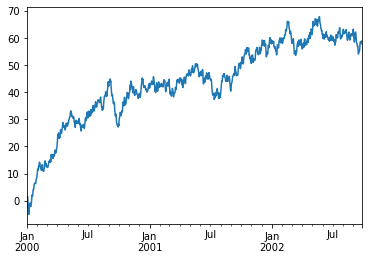

In [12]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

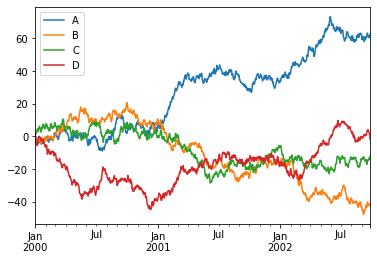

In [14]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')